In [1]:
from astropy.table import Table  
import numpy as np

data_table = Table.read('/home/douglas/Gala-code/correctactions.fits', format = 'fits') 
print(data_table[1].columns)

<TableColumns names=('idx','Jr','Jphi','Jz','Theta_r','Theta_phi','Theta_z','Freq_r','Freq_phi','Freq_z')>


In [2]:
marchetti = Table.read('/home/douglas/data.fits', format = 'fits')
print(marchetti[1].columns)

<TableColumns names=('source_id','ra','dec','parallax','e_parallax','pmra','e_pmra','pmdec','e_pmdec','vrad','e_vrad','GMag','dist','el_dist','eu_dist','rGC','el_rGC','eu_rGC','RGC','el_RGC','eu_RGC','xGC','el_xGC','eu_xGC','yGC','el_yGC','eu_yGC','zGC','el_zGC','eu_zGC','U','el_U','eu_U','V','el_V','eu_V','W','el_W','eu_W','UW','el_UW','eu_UW','vR','el_vR','eu_vR','vtot','el_vtot','eu_vtot','P_ub')>


In [3]:
Jr = np.array(data_table["Jr"][:119629])
Jphi = np.array(data_table["Jphi"][:119629])
Jz = np.array(data_table["Jz"][:119629])
Or = np.array(data_table["Freq_r"][:119629])
Ophi = np.array(data_table["Freq_phi"][:119629])
Oz = np.array(data_table["Freq_z"][:119629])
idx = np.array(data_table["idx"][:119629])

In [4]:
X = []
Y = []
Z = []
U = []
V = []
W = []

for i in idx:
    X.append(marchetti["xGC"][i]*0.001)
    Y.append(marchetti["yGC"][i]*0.001)
    Z.append(marchetti["zGC"][i]*0.001)
    U.append(marchetti["U"][i])
    V.append(marchetti["V"][i])
    W.append(marchetti["W"][i])

X = np.array(X)
Y = np.array(Y)
Z = np.array(Z)
U = np.array(U)
V = np.array(V)
W = np.array(W)

In [5]:
orbitvalues = Table.read('/home/douglas/Gala-code/correctorbitvalues.fits', format = 'fits') 
zmax = orbitvalues["zmax"]
rmax = orbitvalues["maxr"]
rmin = orbitvalues["minr"]

/home/douglas/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/douglas/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


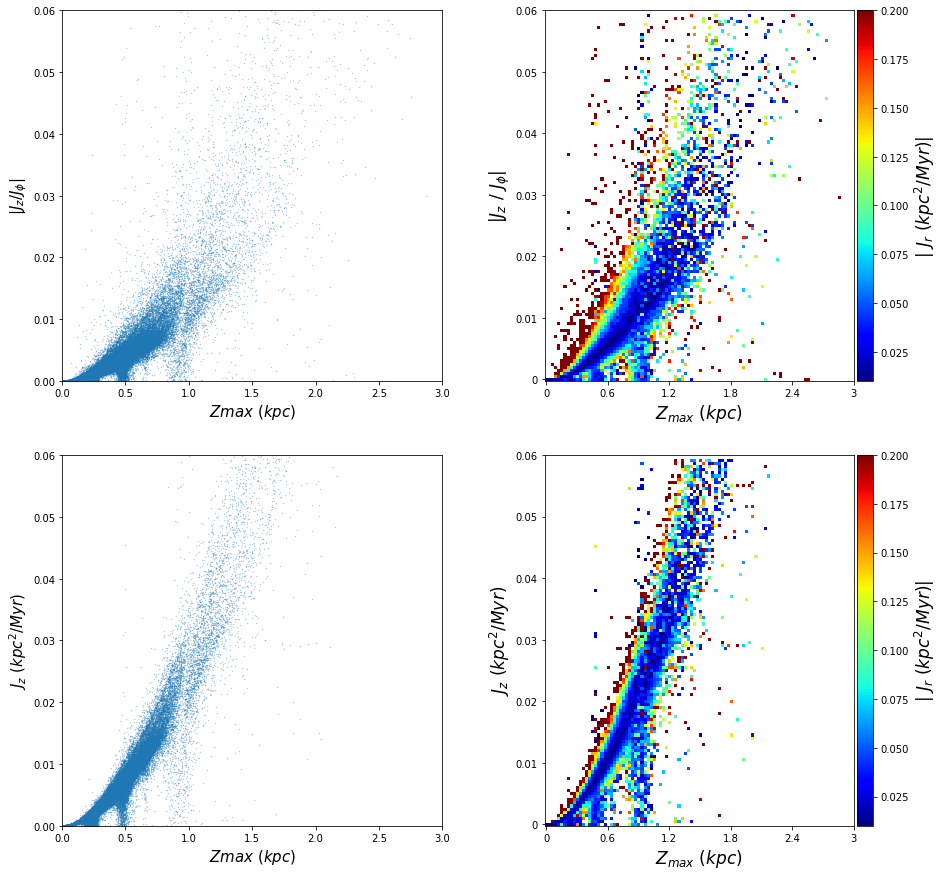

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig,axs = plt.subplots(2,2, figsize=(15,15))

axs[0,0].scatter(zmax, np.abs(Jz/Jphi), s=0.1, alpha=0.5)
axs[0,0].axis([0, 3, 0, 0.06])
axs[0,0].set_xlabel("$Zmax\ (kpc)$",fontsize=15)
axs[0,0].set_ylabel("$|J_z/J_{\phi}|$", fontsize=15)

axs[1,0].scatter(zmax, Jz, s=0.1, alpha=0.5)
axs[1,0].axis([0, 3, 0, 0.06])
axs[1,0].set_xlabel("$Zmax\ (kpc)$",fontsize=15)
axs[1,0].set_ylabel("$J_z\ (kpc^2/{Myr})$", fontsize=15)

for i in range (0,2):
    if i == 0:
        ax = 0
        xmin = 0
        xmax = 3
        ymin = 0
        ymax = 0.06
        vmin = 0.01
        vmax = 0.2
        x = zmax
        y = np.abs(Jz/Jphi)
        w = Jr
        ylabel = '$|J_z\ /\ J_{\phi}|$'
        label = '$|\ J_r\ (kpc^2/Myr)|$'
    else:
        ax = 1
        y = Jz
        ylabel = '$J_z\ (kpc^2/Myr)$'
    
    bin_x = np.arange(xmin,xmax, step=0.03)           ## 100
    bin_y = np.arange(ymin, ymax, step=0.0005)        ## 120
    H, xed, yed = np.histogram2d(x, y, bins=(bin_x,bin_y))
    color_func = np.ndarray(shape=(len(yed)-1,len(xed)-1))
    
    for j in range(0, len(bin_x)-1):
        for k in range(0, len(bin_y)-1):
            ichoose = np.where( (x>bin_x[j]) & (x<bin_x[j+1]) 
                               & (y>bin_y[k]) & (y< bin_y[k+1]))

            color_func[k,j] = np.abs(np.median(w[ichoose]))

    ##############################################################################
    # Setting figure size and plotting mean_Vphi with colorbar. Selected v-values 
    # for ease of seing spiral. Actual range between 180 and 250.
    T = axs[ax,1].imshow(color_func, cmap = 'jet',origin='lower',vmin = vmin ,vmax = vmax)
    divider = make_axes_locatable(axs[ax,1])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    bar = plt.colorbar(T, cax=cax)

    ##############################################################################
    # Setting aspect as 100/120 (bin_x/bin_y) so the image is a square
    bar.set_label(label,size=17)
    axs[ax,1].set_xlabel("$Z_{max}\ (kpc)$", fontsize=17)
    axs[ax,1].set_ylabel(ylabel, fontsize=17)
    plt.setp(axs[ax,1], xticks=[0, 20, 40, 60, 80, 100], xticklabels=['0','0.6','1.2','1.8','2.4','3'],
        yticks=[0, 20, 40, 60, 80, 100, 120], yticklabels=['0','0.01','0.02','0.03','0.04','0.05','0.06'])